<img style = "float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width = "300" height = "500" /> 
    
    
### <font color = "navy"> Simulación de procesos financieros. <font> 

**Nombres:** Moises Flores Ortíz y Miriam Eunice Rosas Medellín.

**Fecha:** 28 de abril del 2021.

**Expediente**: 722183 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22
**Link al repositorio en Github**: https://github.com/Miriam1999/Tarea9_MFlores_MERosas

## Ejercicio 1

### Solución de Moises

In [1]:
### Librerias  a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
from datetime import date
import seaborn as sns; sns.set();
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

### Selección de activo subyacente y opción put a evaluar

Se escogió como activo subyacente a las acciones de la empresa NVIDIA por lo que se prentende analizar una de las opciones de tipo put para una fecha futura. El tipo put se toma cuando se espera que el activo subyacente baje de valor, pues se espera la ganancia de la operación en el diferencial de un strike mayor al precio spot de la fecha futura.

In [2]:
# Función para descargar precios de cierre ajustados
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

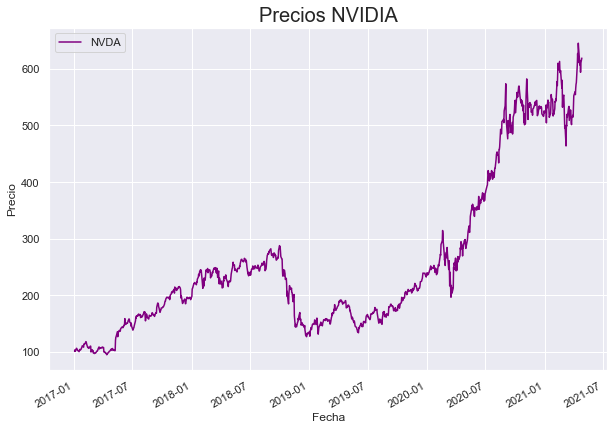

In [3]:
ticker = ['NVDA']### Se define la clave  de cotización de la empresa envidia en bolsa
start_date = '2017-01-01' ### Se define la fecha desde la cual se tomaran los datos de la empresa

closes_nvda = get_adj_closes(ticker, start_date)### Se llaman a los cierres ajustados de los precios diarios
closes_nvda.plot(figsize=(10,7), xlabel='Fecha', ylabel='Precio', color='Purple');
plt.title('Precios NVIDIA', fontsize=20)
plt.legend(ticker);

In [4]:
def calc_daily_ret(closes:"Cierres de los precios descargados"):
    "Esta función retorna los rendimientos logaritmicos diarios de los cierres del activo recibido"
    return np.log(closes/closes.shift(1)).iloc[1:]

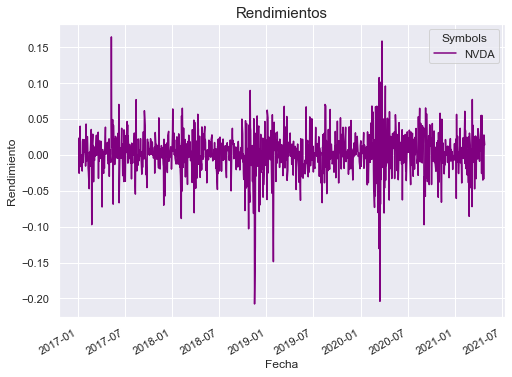

In [5]:
ret_nvda = calc_daily_ret(closes_nvda)### Se genera una variable donde se guardan los rendimientos diarios
ret_nvda.plot(figsize=(8,6), xlabel = 'Fecha', ylabel='Rendimiento', color='purple');
plt.title('Rendimientos', fontsize=15);

In [6]:
nvda = web.YahooOptions('NVDA') ### Se guarda en una variable las opctiones sobre el acitvo NVDA
### Se genera una variable dónde se toma como index la fecha de expiración y se ordena por  esta misma
nvda_opt = nvda.get_all_data().reset_index()
nvda_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,547.5,call,NVDA210430C00547500,...,2021-04-26 20:00:03,2021-04-23 16:42:18,"{'contractSymbol': 'NVDA210430C00547500', 'str..."
2021-04-30,515.0,call,NVDA210430C00515000,...,2021-04-26 20:00:03,2021-04-26 16:12:19,"{'contractSymbol': 'NVDA210430C00515000', 'str..."
2021-04-30,612.5,call,NVDA210430C00612500,...,2021-04-26 20:00:03,2021-04-26 19:59:40,"{'contractSymbol': 'NVDA210430C00612500', 'str..."
2021-04-30,315.0,put,NVDA210430P00315000,...,2021-04-26 20:00:03,2021-03-19 19:34:42,"{'contractSymbol': 'NVDA210430P00315000', 'str..."
2021-04-30,612.5,put,NVDA210430P00612500,...,2021-04-26 20:00:03,2021-04-26 19:57:41,"{'contractSymbol': 'NVDA210430P00612500', 'str..."
...,...,...,...,...,...,...,...
2023-01-20,900.0,call,NVDA230120C00900000,...,2021-04-26 20:00:03,2021-04-26 18:06:17,"{'contractSymbol': 'NVDA230120C00900000', 'str..."
2023-01-20,900.0,put,NVDA230120P00900000,...,2021-04-26 20:00:03,2021-04-26 15:31:01,"{'contractSymbol': 'NVDA230120P00900000', 'str..."
2023-01-20,640.0,put,NVDA230120P00640000,...,2021-04-26 20:00:03,2021-04-23 17:55:36,"{'contractSymbol': 'NVDA230120P00640000', 'str..."


In [7]:
K = 450# Se define un strike price deseado
### Se toma la opción que se ofrece para la fecha de expiración 2023-01-20
indice_opt = nvda_opt.loc[(nvda_opt.Type=='put') & (nvda_opt.Strike==K) & (nvda_opt.Expiry=='2023-01-20')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
754,450.0,2023-01-20,put,...,2021-04-26 20:00:03,2021-04-23 19:14:44,"{'contractSymbol': 'NVDA230120P00450000', 'str..."


In [8]:
### Se accede a la información de la opción put escogida para observar el lastprice el cuál es el que se pretende aproximar
i_opt= indice_opt.index
opcion_valuar = nvda_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'NVDA230120P00450000',
 'strike': 450.0,
 'currency': 'USD',
 'lastPrice': 44.75,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 217,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619205284,
 'impliedVolatility': 0.062509375,
 'inTheMoney': False}

In [9]:
print(f'último precio de cierre: {nvda_opt.Underlying_Price[0]}')

último precio de cierre: 619.12


In [10]:
mu = ret_nvda.mean()[0] ###Se toma la media de los rendimientos del activo NVDA
sigma = ret_nvda.std()[0] ###Se toma la desviación estandar de los rendiemientos del activo NVDA
print(f' Rendimientos diarios con media: {mu} y desviación estandar: {sigma}')

 Rendimientos diarios con media: 0.0016747690642635407 y desviación estandar: 0.030165084740209434


Debido al principio general de la valoración neutral al riesgo que establece: cualquier título que depende de otros títulos negociados puede valorarse bajo el supuesto de que el mundo es neutral al riesgo, entonces, el rendimiento esperado de todos los títulos es la tasa de interés libre de riesgo, y la tasa de descuento correcta para los flujos de efectivo esperados también es la tasa de interés libre de riesgo. Por tanto, es necesario obtener la tasa libre de riego que se puede consultar en la página del Tesoro de los Estados Unidos.

In [11]:
# Tasa de bonos de 1 yr de fecha 04/23/2021 -> 0.070%
r = 0.0007/360 # Tasa diaria

### Ejercicio de valuación de la prima put sobre el activo NVDA de manera análitica

Los supuestos que hicieron Black y Scholes cuando dedujeron su fórmula para la valoración de opciones fueron los siguientes:
1. El comportamiento del precio de la acción corresponde al modelo logarítmico normal, con $\mu$ y $\sigma$
constantes.
2. No hay costos de transición ni impuestos. Todos los títulos son perfectamente divisibles.
3. No hay dividendos sobre la acción durante la vida de la opción.
4. No hay oportunidades de arbitraje libres de riesgo.
5. La negociación de valores es continua.
6. Los inversionistas pueden adquirir u otorgar préstamos a la misma tasa de interés libre de riesgo.
7. La tasa de interés libre de riesgo a corto plazo, r, es constante.

Bajo los supuestos anteriores podemos presentar las **fórmulas de Black-Scholes** para calcular los precios de compra y de venta europeas sobre acciones que no pagan dividendos:

Para opciones `put`:
$$
\text{Valor actual de la opción} = V(S_0, T) = K e^{-r*T} N(-d_2) - S_0 N(-d_1)  
$$

donde:
- $S_0$ = precio de la acción en el momento actual.
- $K$ = precio "de ejercicio" de la opción.
- $r$ = tasa de interés libre de riesgo.
- $T$ = tiempo que le resta de vida a la opción.
- $N(d)$ = función de distribución de la variable aleatoria normal con media nula y desviación típica unitaria
(probabilidad de que dicha variable sea menor o igual que d). Función de distribución de probabilidad acumulada.
- $\sigma$ = varianza por período de la tasa o tipo de rendimiento de la opción.

$$
d_1 = \frac{\ln{\frac{S_0}{K}} + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}}, \quad d_2 = \frac{\ln{\frac{S_0}{K}} + (r - \sigma^2 / 2) T}{\sigma \sqrt{T}} 
$$

La función de pago $f(S_T)$ está representada para las acciones put como  $f(S_T) = \max({K - S_T})$.

Por lo tanto, se comienza por definir cada uno de los componentes de las fomulas para la valuación del activo subyacente NVDA:

- $S_0$ = 618.19
- $K$ = 450.
- $r$ = 0.07%.
- $T$ = 455.
- $N(d)$ = función de distribución de la variable aleatoria normal con media nula y desviación típica unitaria
(probabilidad de que dicha variable sea menor o igual que d). Función de distribución de probabilidad acumulada.
- $\sigma$ = 0.03016.

Ahora se calcula $d_1$ y $d_2$:

$$
d_1 = \frac{\ln{\frac{618.19}{450}} + (\frac{0.0007}{360}) + (0.03016)^2 / 2) 455}{0.03016 \sqrt{455}} = 0.816640, \quad d_2 = \frac{\ln{\frac{618.19}{450}} - (\frac{0.0007}{360}) + (0.03016)^2 / 2) 455}{0.03016 \sqrt{455}} = 0.170555
$$

De acuerdo a la tabla Z o al comando st.norm.cdf() de d1 y d2 se tiene que $$ N(-d_1) = 0.207067  $$ y $$ N(-d_2) = 0.432286$$ 

Entonces, podemos valuar la opción put:

$$
V(S_0, T) = K e^{-r*T} N(-d_2) - S_0 N(-d_1) 
$$
$$
V(618.9, 455) = (450) e^{-(\frac{0.0007}{360})*455}(0.432286) - (618.19)(0.207067) = 66.35
$$

### Suponiendo que los rendimientos tienen una distribución normal

Bajo el supuesto de que los rendimientos tienen una distribución normal entonces podemos aplicar este método de valuación de opciones que consiste en la generación de rendimientos a futuro hasta la fecha de expiración de la opción y obtener así, con la función de utilidad, el valor actual de la opción y su comportamiento diario hasta la fecha de expiración. 

In [12]:
today = pd.Timestamp(date.today()) ###Se define una variable con el día de hoy de tipo timestamp
expiry = opcion_valuar.Expiry ###Se toma la fecha de expiración de la opción
K = opcion_valuar['JSON']['strike']###Se toma el strike price

###Se genera el rando de fechas a simular tomando solamente los Bussines days
dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)###Se toma el número de días a simular
nscen = 100000 ###Se define el numero de escnarios a simular

### Se toma el precio spot
S0 = closes_nvda.iloc[-1,0]  

###Se hace la simulaciónn de los rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

###Se hace la simulación de los precios
sim_closes = S0*np.exp(sim_ret.cumsum())

sim_closes.iloc[0,:] = S0
sim_closes

,0,1,2,...,99997,99998,99999
2021-04-26,619.120,619.120,619.120,...,619.120,619.120,619.120
2021-04-27,638.409,659.755,606.362,...,598.812,643.652,653.550
2021-04-28,631.617,659.142,616.008,...,591.754,612.250,636.717
2021-04-29,634.117,674.177,594.312,...,574.580,631.346,636.009
2021-04-30,636.178,663.549,613.023,...,567.259,630.082,632.690
...,...,...,...,...,...,...,...
2023-01-16,339.850,267.295,739.324,...,1168.309,578.400,694.786
2023-01-17,345.570,264.649,742.545,...,1191.672,578.704,702.019
2023-01-18,350.357,261.723,716.320,...,1173.299,587.602,657.801
2023-01-19,356.106,255.438,685.039,...,1190.064,605.200,655.726


Para comprobar que está funcionando la simulación de los rendimientos y los precios simulados se gráfica una muestra de 10 escenarios:

<AxesSubplot:>

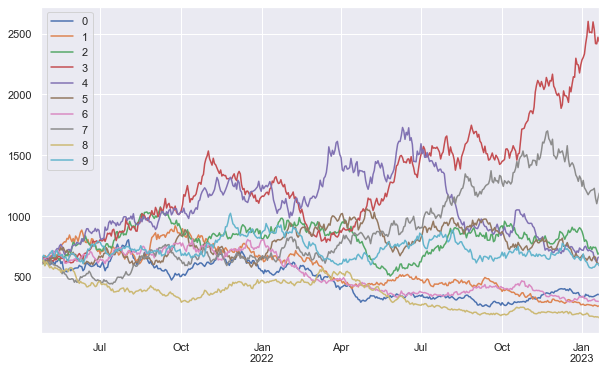

In [13]:
sim_closes.iloc[:,:10].plot(figsize=[10,6])

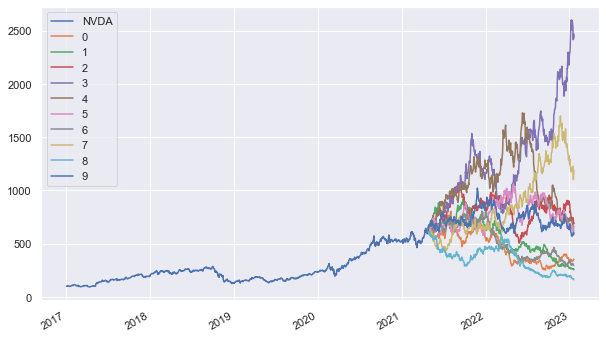

In [14]:
pd.concat([closes_nvda,sim_closes.iloc[:,:10]]).plot(figsize=[10,6]);

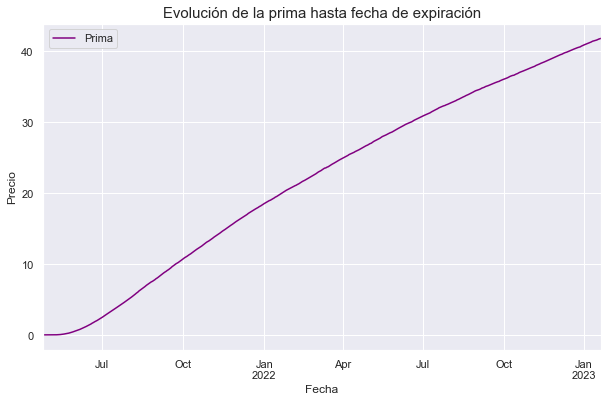

In [15]:
###Se genera una matriz con el valor del strike price
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del put europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike - sim_closes,0).mean(axis=1)}, index=dates)
put.plot(figsize=(10,6), xlabel = 'Fecha', ylabel='Precio', color='purple');
plt.title('Evolución de la prima hasta fecha de expiración', fontsize=15);

Como se puede observar el precio de la prima va al alza, ya que cada vez la diferencia entre el strike y la simulación de los cierres es más amplia, dicho de otra manera, hay una expectativa de que los precios de la empresa NVDIA vayan a la baja en los siguientes años por lo que tomar una ocpión put se va encareciendo a medida que va llegando la expiración. A continucación, podemos ver cuál es el valor de la prima a fecha de expiración y compararlo con el lastprice yahoo finance.

In [16]:
### Se obtiene el precio de la prima a fecha de expiración, ósea la opción a valuar
print(f'Este es el valor de la prima a fecha de expiración: {put.iloc[-1][0]}')

Este es el valor de la prima a fecha de expiración: 41.84920547206753


In [17]:
###Intervalo de confianza
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(f'La prima es {put.iloc[-1][0]} está en el intervalo{i2} con una confianza del 99%')


La prima es 41.84920547206753 está en el intervalo(37.37950085910675, 46.318910085028314) con una confianza del 99%


In [18]:
opcion_valuar['JSON']###Se obtiene la información de la opción put a valuar

{'contractSymbol': 'NVDA230120P00450000',
 'strike': 450.0,
 'currency': 'USD',
 'lastPrice': 44.75,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 217,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619205284,
 'impliedVolatility': 0.062509375,
 'inTheMoney': False}

De acuerdo a la simulación de los precios hasta la fecha de expiración y la valuación de la opción: la prima a fecha de expiración es de 41.958 con una confianza del 99% que se encuentra en el rango de (37.489, 46.427). Si comparamos con el last price (YahooFinance) de la prima que es 44.75 vemos que la simulación se asemeja bastante. 

### Aplicando reducción de varianza

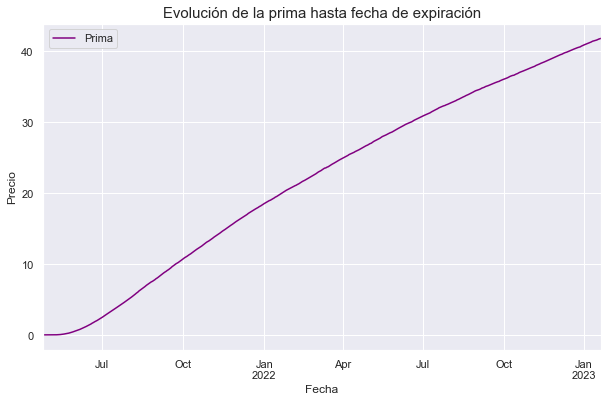

In [19]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.randn(ndays,nscen)) /nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret2.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates) 
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike - sim_closes2,0).T.mean()}, index=dates)
put.plot(figsize=(10,6), xlabel = 'Fecha', ylabel='Precio', color='purple');
plt.title('Evolución de la prima hasta fecha de expiración', fontsize=15);

In [20]:
print(f'Este es el valor de la prima a fecha de expiración: {put.iloc[-1][0]} con reducción de varinza')

Este es el valor de la prima a fecha de expiración: 41.84920547206778 con reducción de varinza


In [21]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(f'La prima es {put.iloc[-1][0]} está en el intervalo{i2} con una confianza del 99%')

La prima es 41.84920547206778 está en el intervalo(37.379500859107, 46.31891008502856) con una confianza del 99%


### Usando el histograma de los rendimientos

Ahora se intenta ajustar una función de distribución de los datos para intentar aumentar el accuracy. Primeramente, se gráfica el histograma para ver  como se comportan los datos, en este caso los precios de NVDIA al igual que en la clase muuestran tener una distribución semejante  a la distribución $t$ por lo que se ajustará y se hará la prueba de quantil quantil para ver si tienen dicho comportamiento. Posterioremente, se pasará a simular los rendimientos con dicha distribución y se evaluará la función de distribución hasta la fecha de expiración.

Text(0.5, 1.0, 'Histograma de los rendimientos de NVIDIA')

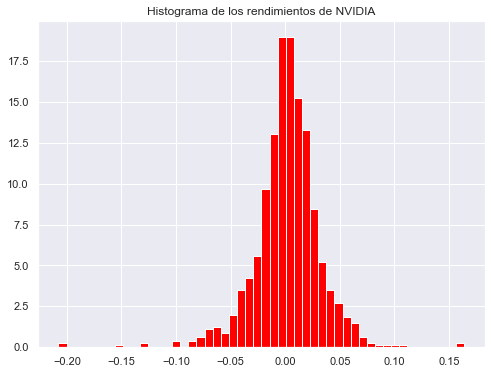

In [22]:
plt.figure(figsize=[8,6])
plt.hist(ret_nvda, bins=50, density=True, color='red')
plt.title('Histograma de los rendimientos de NVIDIA')

Al observar la distribución de los datos podemos apreciar que tienen una distribución parecida a la distribución $t$ por lo que conviene hacer el ajuste y la pruba de Quantil Quantil para poder aproximar una distribución que se ajuste mejor que la normal. A conticuación, se aplica.

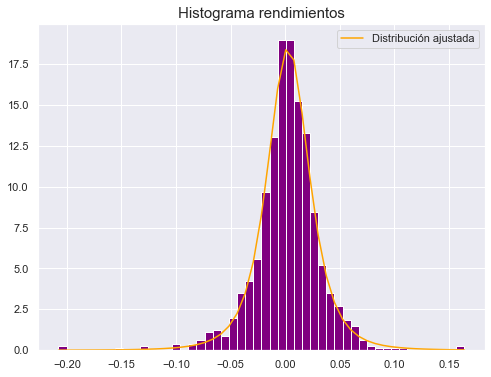

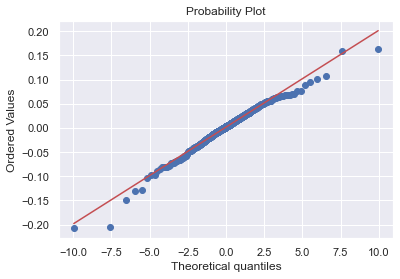

In [23]:
# Histograma de los rendimientos
plt.figure(figsize=[8,6])
y, x, _ = plt.hist(ret_nvda['NVDA'], bins=50, density=True, color='purple')
plt.title('Histograma rendimientos', fontsize=15)

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ret_nvda.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada', color='orange')
plt.legend()
plt.show()

# Q-Q
st.probplot(ret_nvda['NVDA'], sparams=params[:-2], dist=dist, plot=plt);


Tal como se puede observar la distribución $t$ ofrece un buen ajuste a los rendimientos diaros ya que en la mayoría de sus quantiles observamos, sobre todo en la parte media, obervamos como se ajustan los datos, pero es importante decir que se tienen colas más pesadas en ambos extremos. Se procede a aplicar con está distribución la simulación de los precios.

In [24]:
K = opcion_valuar['JSON']['strike']###Se toma el strike
ndays = len(dates)###Se definen los dias a simular
nscen = 100000###Se definen los escenarios a simular

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_nvda+r-mu, bins=2000, density=True)
prob = freq/np.sum(freq) ###Se obtiene la probailidad de cada dato a partir del histograma

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

S0 = closes_nvda.iloc[-1,0]

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = S0 * np.exp(sim_ret_hist.cumsum())

sim_closes_hist.iloc[0,:] = S0
sim_closes_hist

,0,1,2,...,99997,99998,99999
2021-04-26,619.120,619.120,619.120,...,619.120,619.120,619.120
2021-04-27,593.104,614.653,613.169,...,635.801,610.326,644.008
2021-04-28,610.726,630.449,614.027,...,637.283,633.150,653.598
2021-04-29,650.751,604.011,601.322,...,641.743,620.511,639.005
2021-04-30,656.525,585.171,580.081,...,653.724,626.016,612.891
...,...,...,...,...,...,...,...
2023-01-16,1147.600,1006.092,1026.111,...,294.366,2549.776,710.299
2023-01-17,1144.090,994.660,1005.628,...,297.088,2476.222,701.184
2023-01-18,1184.450,1001.063,1034.930,...,315.501,2538.445,698.390
2023-01-19,1179.292,1014.459,1033.876,...,309.721,2430.637,709.317


Para comprobar que está funcionando la simulación de los rendimientos se gráfica la muestra de 10 escenarios:

<AxesSubplot:>

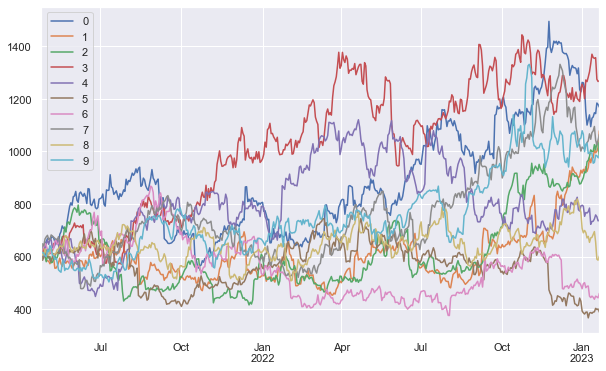

In [25]:
sim_closes_hist.iloc[:,:10].plot(figsize=[10,6])

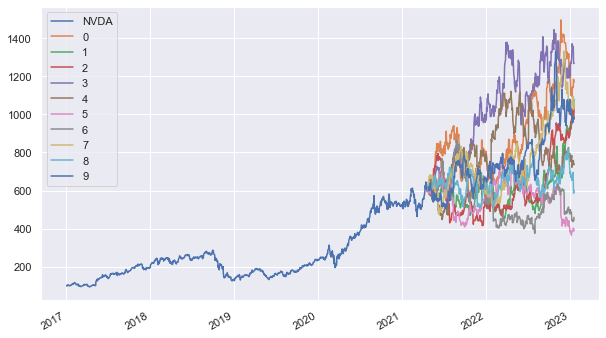

In [26]:
pd.concat([closes_nvda,sim_closes_hist.iloc[:,:10]]).plot(figsize=[10,6]);

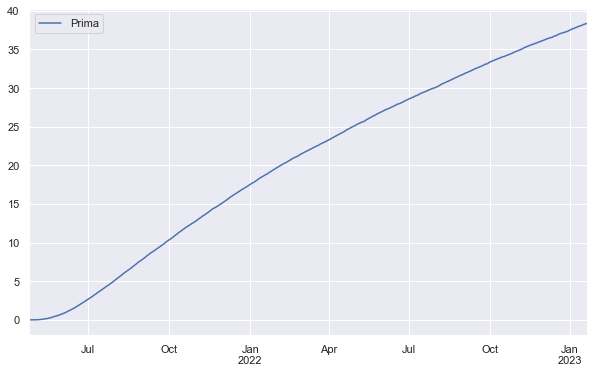

In [27]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)###Se hace un vector constante del strike
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,0).T.mean()}, index=dates)###Se hace un df con la valuació diaria
put_hist.plot(figsize=[10,6]);                                                      ###de la prima hasta expiración

In [28]:
put_hist.iloc[-1]###Se muestra el precio a la expiración de la prima
print(f'Este es el valor de la prima a fecha de expiración: {put_hist.iloc[-1][0]}')

Este es el valor de la prima a fecha de expiración: 38.35671343992956


In [29]:
opcion_valuar['JSON']###S emuestrab los datos de la opción a valuar

{'contractSymbol': 'NVDA230120P00450000',
 'strike': 450.0,
 'currency': 'USD',
 'lastPrice': 44.75,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 217,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619205284,
 'impliedVolatility': 0.062509375,
 'inTheMoney': False}

In [30]:
confianza = 0.95###Se define un intervalo de confianza
sigma_est = sim_closes_hist.iloc[-1].sem()###Se toma la desviación de lo datos
mean_est = put_hist.iloc[-1].Prima###Se toma la media de los datos
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)###Se define el intervalo de confianza para t
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)###Se define en intervalo de confianza para la normal
print(i1)
print(i2)

(34.85918240882112, 41.854244471037994)
(34.85922474211689, 41.85420213774222)


Se puede observar que a fecha de expiración el precio de la prima es 37.61 con un intervalo de confianza del 95% que se encuentra entre el (34.13, 41.10), sin embargo, el last price corresponde al 44.75, en comparación a la simulación de la distribución normal,  la distribución t resulto en un menor accuracy. Respecto a la conclusión general del ejercicio de simulación es posible decir que la aplición de la simulación de montecarlo usando  funciones de distribución es funcional para valuar las opciones que hay en el mercado sobre los diversos activos apegandose a los supuestos de Black and Scholes. 

Para concluir todo el ejercicio: observamos que por el método analitico la valaución de la opción put tiene una diferencia considerable respecto a los resultados obtenidos en la simulación y respecto al last price esto debido a que black and schols solo funciona bajo los supuestos hacen al mercado como neutral al riesgo, sin embargo, en la realidad estos supuestos no se cumplen y es precisamente la diferencia que se está notando. En cuanto a la simulación se nota que la más acercada al last price fue en la que se asume que los rendimientos tienen una distribución normal pues la diferencia solo fue de 2 unidades aproximadamente por lo que podemos decir que este método de evaluación para el activo NVDA es funcional.

### Solución de Miriam

In [1]:
# Librerías a usar
import datetime
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
import pandas_datareader.data as web
%matplotlib inline

# Algunas opciones para Pandas
pd.set_option("display.notebook_repr_html", True)
pd.set_option("display.max_columns", 6)
pd.set_option("display.max_rows", 10)
pd.set_option("display.width", 78)
pd.set_option("precision", 3)

# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date = None, end_date = None):
    # Fecha inicio por defecto (start_date = "2010-01-01") y fecha fin por defecto (end_date = today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name = tickers, data_source = "yahoo", start = start_date, end = end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes["Adj Close"]
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace = True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes / closes.shift(1)).iloc[1:]

Graficar precios de cierre (escogí opciones de Disney):

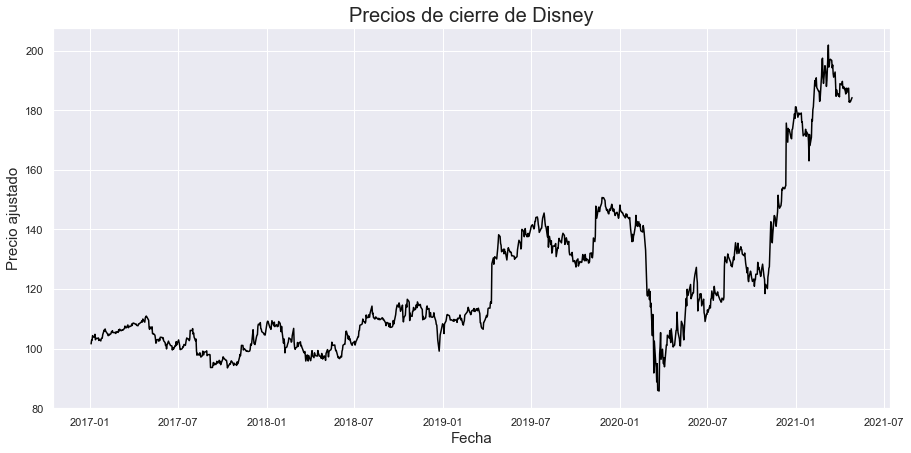

In [2]:
ticker = ["DIS"]
start_date = "2017-01-01"
closes_dis = get_adj_closes(ticker, start_date)
plt.figure(figsize = [15, 7])
plt.plot(closes_dis, color = "black")
plt.title("Precios de cierre de Disney", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Precio ajustado", fontsize = 15)
plt.show()

Graficar rendimientos:

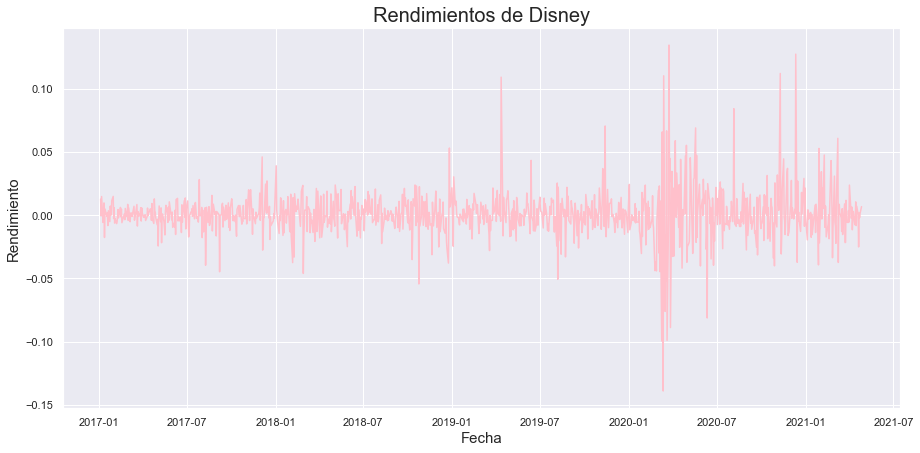

In [3]:
ret_dis = calc_daily_ret(closes_dis)
plt.figure(figsize = [15, 7])
plt.plot(ret_dis, color = "pink")
plt.title("Rendimientos de Disney", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Rendimiento", fontsize = 15)
plt.show()

Obtener los datos de las opciones:

In [4]:
dis = web.YahooOptions("DIS")
dis_opt = dis.get_all_data().reset_index()
dis_opt.set_index("Expiry").sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,177.5,call,DIS210430C00177500,...,2021-04-26 20:03:01,2021-04-26 19:17:36,"{'contractSymbol': 'DIS210430C00177500', 'stri..."
2021-04-30,172.5,call,DIS210430C00172500,...,2021-04-26 20:03:01,2021-04-26 18:28:24,"{'contractSymbol': 'DIS210430C00172500', 'stri..."
2021-04-30,222.5,call,DIS210430C00222500,...,2021-04-26 20:03:01,2021-04-22 17:23:45,"{'contractSymbol': 'DIS210430C00222500', 'stri..."
2021-04-30,225.0,call,DIS210430C00225000,...,2021-04-26 20:03:01,2021-04-21 19:12:30,"{'contractSymbol': 'DIS210430C00225000', 'stri..."
2021-04-30,205.0,call,DIS210430C00205000,...,2021-04-26 20:03:01,2021-04-26 19:09:18,"{'contractSymbol': 'DIS210430C00205000', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,80.0,put,DIS230120P00080000,...,2021-04-26 20:03:01,2021-04-15 14:58:55,"{'contractSymbol': 'DIS230120P00080000', 'stri..."
2023-01-20,130.0,put,DIS230120P00130000,...,2021-04-26 20:03:01,2021-04-23 15:13:38,"{'contractSymbol': 'DIS230120P00130000', 'stri..."
2023-01-20,230.0,put,DIS230120P00230000,...,2021-04-26 20:03:01,2021-04-21 16:41:58,"{'contractSymbol': 'DIS230120P00230000', 'stri..."


Fijar un precio Strike y una fecha de expiración del contrato:

In [5]:
K = 290 # Strike price
indice_opt = dis_opt.loc[(dis_opt.Type == "put") & (dis_opt.Strike == K) & (dis_opt.Expiry == "2023-01-20")]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
873,290.0,2023-01-20,put,...,2021-04-26 20:03:01,2021-04-19 15:01:33,"{'contractSymbol': 'DIS230120P00290000', 'stri..."


Ver datos de la opción que se encontró:

In [6]:
i_opt = indice_opt.index
opcion_valuar = dis_opt.loc[i_opt[0]]
opcion_valuar["JSON"]

{'contractSymbol': 'DIS230120P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 106.6,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 18,
 'bid': 108.8,
 'ask': 110.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1618844493,
 'impliedVolatility': 0.29114478393554677,
 'inTheMoney': True}

In [7]:
print("El precio actual del activo subyacente (acciones de Disney) es " + str(opcion_valuar.Underlying_Price) + ".")

El precio actual del activo subyacente (acciones de Disney) es 184.27.


No se tomará la media sino la tasa libre de riesgo de $0.07 \%$, basada en el bono a un año del tesoro de *Estados Unidos* debido a que se hace una valoración neutral al riesgo. Además, los precios van desde hoy hasta la fecha `Expiry`:

In [29]:
mu = ret_dis.mean()[0]
sigma = ret_dis.std()[0]
r = 0.0007 / 360 # tasa diaria libre de riesgo
today = pd.Timestamp(datetime.date.today())
expiry = opcion_valuar.Expiry
T = expiry - today
print("La media de los rendimientos de Disney es " + str(mu) + ".")
print("La desviación estándar de los rendimientos de Disney es " + str(sigma) + ".")
print("La tasa libre de riesgo es " + str(r) + ".")
print("El tiempo que le resta de vida T a la opción de Disney es " + str(T) + ".")

La media de los rendimientos de Disney es 0.0005493658005664091.
La desviación estándar de los rendimientos de Disney es 0.018691537896022743.
La tasa libre de riesgo es 1.9444444444444444e-06.
El tiempo que le resta de vida T a la opción de Disney es 634 days 00:00:00.


**Valuación usando el modelo de Black Scholes**:

Los supuestos son los siguientes:
1. El comportamiento del precio de la acción corresponde al modelo logarítmico normal, con $\mu$ y $\sigma$ constantes.
2. No hay costos de transición ni impuestos. Todos los títulos son perfectamente divisibles.
3. No hay dividendos sobre la acción durante la vida de la opción.
4. No hay oportunidades de arbitraje libres de riesgo.
5. La negociación de valores es continua.
6. Los inversionistas pueden adquirir u otorgar préstamos a la misma tasa de interés libre de riesgo.
7. La tasa de interés libre de riesgo a corto plazo, r, es constante.

El valor actual de la opción es:
$$ \text{Valor actual de la opción put} = V(S_0, T) = K e^{-r \cdot T} \cdot N(-d_2) - S_0 \cdot N(-d_1) $$

Donde:
- $S_0$ = precio de la acción en el momento actual.
- $K$ = precio "de ejercicio" de la opción.
- $r$ = tasa de interés libre de riesgo.
- $T$ = tiempo que le resta de vida a la opción.
- $N(d)$ = función de distribución de la variable aleatoria normal con media nula y desviación típica unitaria (probabilidad de que dicha variable sea menor o igual que d). Función de distribución de probabilidad acumulada.
- $\sigma$ = desviación estándar por período de la tasa o tipo de rendimiento de la opción.

Para calcular $d_1$ y $d_2$:
$$ d_1 = \frac{\ln{\frac{S_0}{K}} + (r + \frac{\sigma^2}{2}) \cdot T}{\sigma \sqrt{T}} = \frac{\ln{\frac{183.94}{290}} + (\frac{0.0007}{360} + \frac{0.018691087396090066^2}{2}) \cdot 634}{0.018691087396090066 \sqrt{634}} = -0.72943238429634$$
$$ d_2 = \frac{\ln{\frac{S_0}{K}} + (r - \frac{\sigma^2}{2}) \cdot T}{\sigma \sqrt{T}} = \frac{\ln{\frac{183.94}{290}} + (\frac{0.0007}{360} - \frac{0.018691087396090066^2}{2}) \cdot 634}{0.018691087396090066 \sqrt{634}} = -1.2000619395334$$

Para calcular $N(-d_1)$ y $N(-d_2)$ hay que ver en la tabla Z (que sirve para obtener las probabilidades acumuladas de las distribuciones normales estándar, con media igual a 0 y desviación estándar $\sigma$ igual a 1):
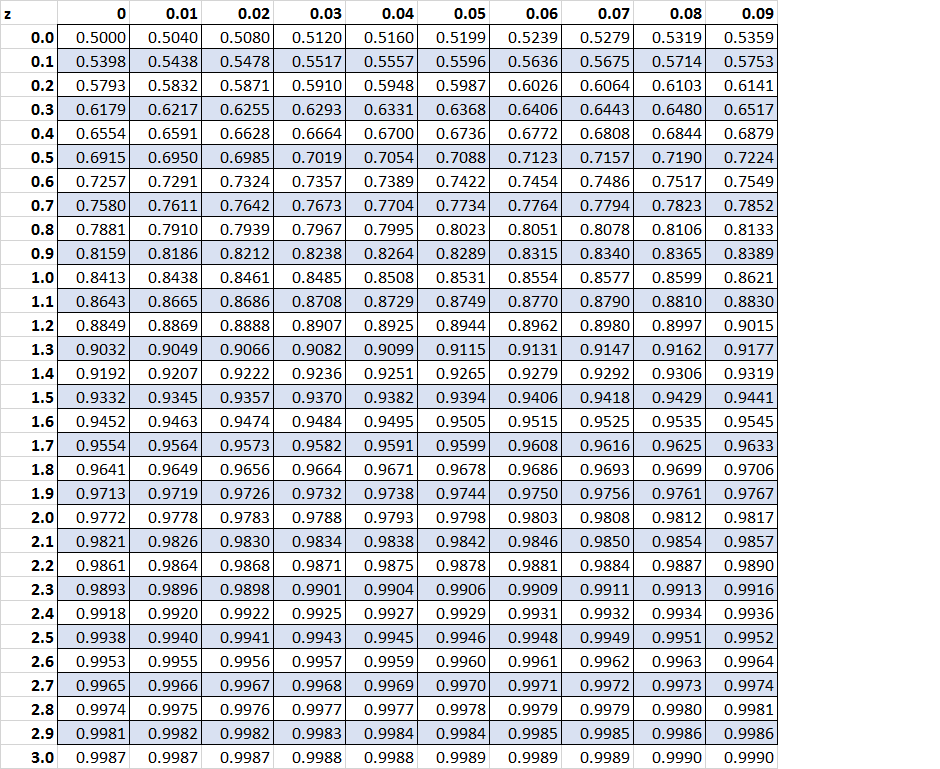

Entonces,
$$N(-d_1) = N(0.72943238429634)= 0.7642$ y $N(1.2000619395334) = 0.8849$$

Así, sustituyendo en la ecuación presentada anteriormente,
$$ \text{Valor actual de la opción} = V(184.27, 634) = 290 e^{-\frac{0.0007}{360} \cdot 634} \cdot 0.8849 - 184.27 \cdot 0.7642 = 115.486 $$

Con este resultado analítico, se podría concluir que según el modelo de Black-Scholes, la opción de Disney está **infravalorada**, pues la valuación resulta en un precio mayor que el precio actual. Esto podría indicar que a un inversor le conviene comprar esta opción de venta.

Las siguientes simulaciones se realizan con 10,000 escenarios aleatorios con el objetivo de obtener una valuación de la *opción de venta* acertada Recordar que la función de pago de las opciones de venta son el precio *strike* menos el precio *spot*. Además se utilizan opciones plan vainilla (europeas).

Se asume que los rendimientos tienen una distribución normal (así dice la teoría) y se hace la simulación:

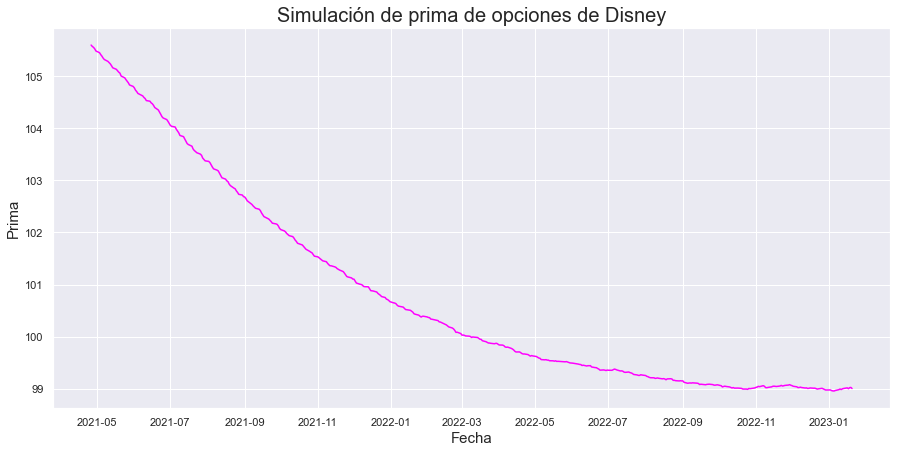

In [9]:
# Tasa de bonos de 1 año de la fecha 04 / 25 / 21 -> 0.070%
np.random.seed(1234) # semilla
K = opcion_valuar["JSON"]["strike"] # strike price
dates = pd.date_range(start = today, end = expiry, freq = "B") # fechas a simular 'bussiness days'
ndays = len(dates) # número de días
nscen = 100000 # número de escenarios
S0 = closes_dis.iloc[-1, 0] # condición inicial del precio a simular 
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays, nscen) + r, index = dates) # simular rendimientos
sim_closes = S0 * np.exp(sim_ret.cumsum()) # simular precios
strike = pd.DataFrame(K * np.ones([ndays, nscen]), index = dates) # frame con el valor del strike
put = pd.DataFrame({"Prima": np.exp(-r * ndays) * np.fmax(strike - sim_closes, 0).mean(axis = 1)}, index = dates) # valor de put
plt.figure(figsize = [15, 7])
plt.plot(put, color = "magenta")
plt.title("Simulación de prima de opciones de Disney", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show()

Mostrar 10 escenarios:

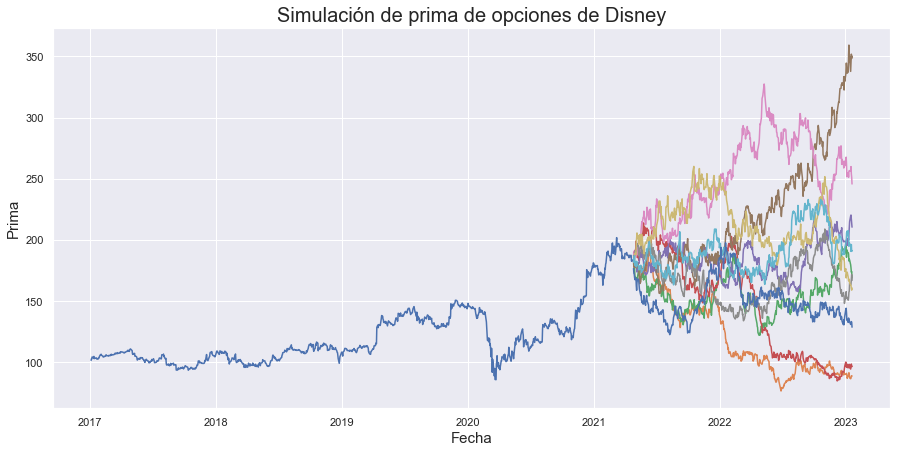

In [10]:
plt.figure(figsize = [15, 7]) # simulación de montecarlo
sim_normal = pd.concat([closes_dis, sim_closes[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])
plt.plot(sim_normal)
plt.title("Simulación de prima de opciones de Disney", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show();

Mostrar la valuación de la opción según la simulación:

In [11]:
put.iloc[-1] # valuación de la opción

Prima    99.002
Name: 2023-01-20 00:00:00, dtype: float64

Se escoge un valor de alpha $\alpha$ (nivel de significancia) de 0.05; es decir, se elige un nivel de confianza de 0.95 para valuar la opción:

In [12]:
confianza = 0.95 # intervalo de confianza
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc = mean_est, scale = sigma_est)
print("Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza", i2)

Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza (98.48620870104261, 99.51872490610182)


In [13]:
opcion_valuar["JSON"] # ver lastprice y compararlo con la valuación anterior

{'contractSymbol': 'DIS230120P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 106.6,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 18,
 'bid': 108.8,
 'ask': 110.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1618844493,
 'impliedVolatility': 0.29114478393554677,
 'inTheMoney': True}

El precio resultante de la valuación de la opción con la simulación es ligeramente menor que el *lastPrice*, lo cual significa que quizás la distribución normal no se ajusta perfectamente a los rendimientos.

**Aplicar reducción de varianza para ver si la valuación se ajusta mejor al *lastPrice*** con muestreo estratificado de N estratos igualmente espaciados:

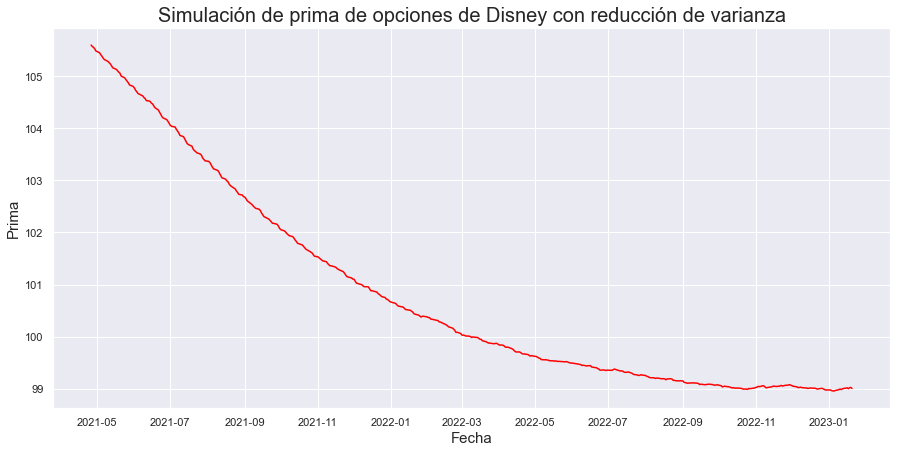

In [14]:
# Usando muestreo estratificado -> # estratros = nscen
np.random.seed(5555)
nscen = 50000 # menos escenarios por la reducción de varianza
U = (np.random.rand(ndays, nscen) + np.arange(0, nscen)) / nscen
Z = st.norm.ppf(U)
sim_ret2 = pd.DataFrame(sigma * Z + r, index = dates)
sim_closes2 = S0 * np.exp(sim_ret2.cumsum())
strike = pd.DataFrame(K * np.ones([ndays, nscen]), index = dates) # función de pago
put = pd.DataFrame({"Prima": np.exp(-r * ndays) * np.fmax(strike - sim_closes2, 0).T.mean()}, index = dates)
plt.figure(figsize = [15, 7])
plt.plot(put, color = "red")
plt.title("Simulación de prima de opciones de Disney con reducción de varianza", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show()

Graficar 10 escenarios de la simulación:

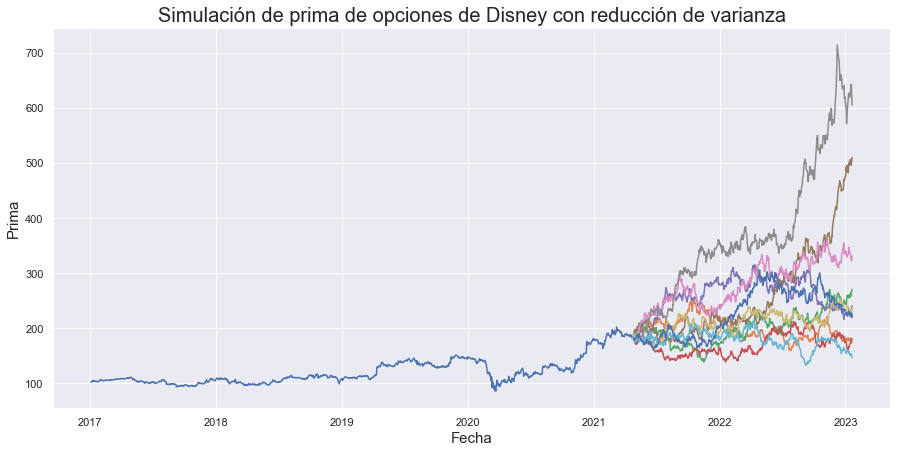

In [15]:
plt.figure(figsize = [15, 7]) # simulación de montecarlo
sim_reduc = pd.concat([closes_dis, sim_closes2[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]])
plt.plot(sim_reduc)
plt.title("Simulación de prima de opciones de Disney con reducción de varianza", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show();

Mostrar la valuación de la opción según la simulación:

In [16]:
put.iloc[-1] # valuación de la opción

Prima    99.002
Name: 2023-01-20 00:00:00, dtype: float64

Se escoge un valor de alpha  𝛼  (nivel de significancia) de 0.05; es decir, se elige un nivel de confianza de 0.95 para valuar la opción:

In [17]:
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc = mean_est, scale = sigma_est)
print("Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza", i2)

Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza (98.48620870104261, 99.51872490610182)


In [18]:
opcion_valuar["JSON"] # ver lastprice y compararlo con la valuación anterior

{'contractSymbol': 'DIS230120P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 106.6,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 18,
 'bid': 108.8,
 'ask': 110.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1618844493,
 'impliedVolatility': 0.29114478393554677,
 'inTheMoney': True}

El precio resultante de la valuación de la opción con la simulación con reducción de varianza es ligeramente menor que el *lastPrice* y es igual al de la simulación sin reducción de varianza, lo cual significa que quizás la distribución normal no se ajusta perfectamente a los rendimientos y que la reducción de varianza no tiene efectos significativos.

**Valuación usando el histograma de los rendimientos** con gráfica cuantil cuantil y una distribución `t`:

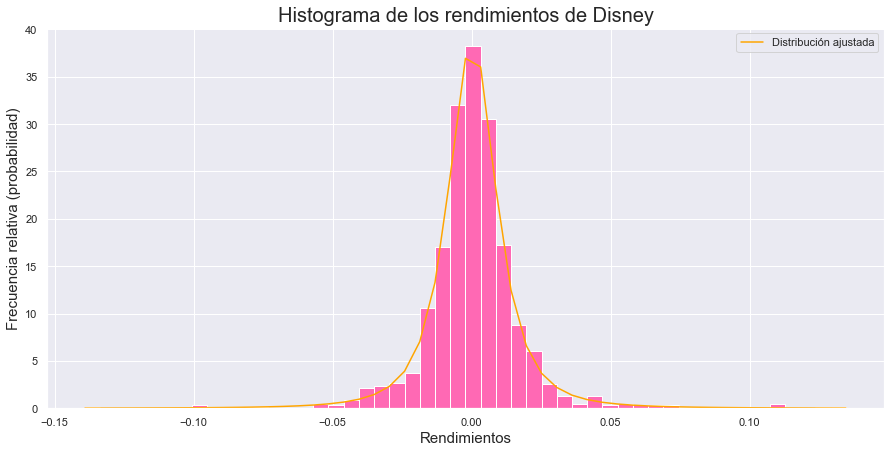

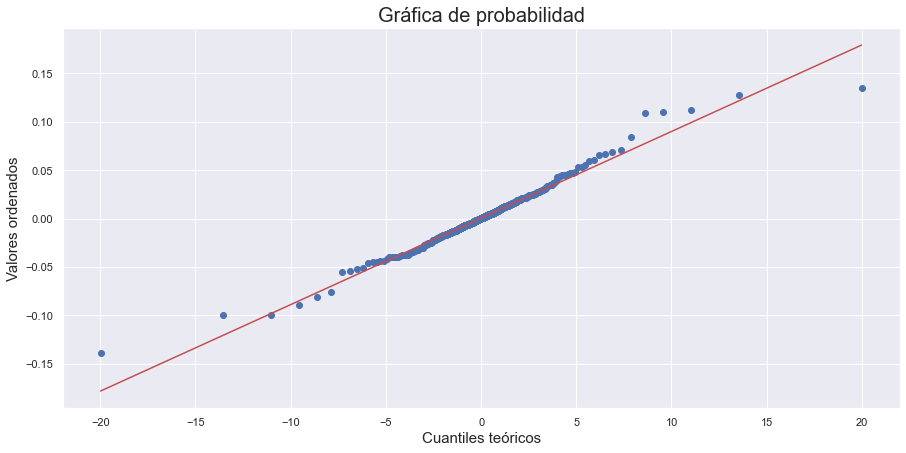

In [19]:
ren = calc_daily_ret(closes_dis) # rendimientos
plt.figure(figsize = [15, 7])
y, x, _ = plt.hist(ren["DIS"], bins = 50, density = True, color = "hotpink") # histograma de los rendimientos
dist = "t" # ajustar los parámetros a una distribución
params = getattr(st, dist).fit(ren.values) 
curve_fit = getattr(st, dist).pdf(x, *params) # generar la pdf de la distribución ajustada con los parámetros encontrados
plt.plot(x, curve_fit, label = "Distribución ajustada", color = "orange")
plt.title("Histograma de los rendimientos de Disney", fontsize = 20)
plt.xlabel("Rendimientos", fontsize = 15)
plt.ylabel("Frecuencia relativa (probabilidad)", fontsize = 15)
plt.legend()
plt.show()
plt.figure(figsize = [15, 7])
st.probplot(ren["DIS"], sparams = params[:-2], dist = dist, plot = plt); # gráfica Q-Q
plt.title("Gráfica de probabilidad", fontsize = 20)
plt.xlabel("Cuantiles teóricos", fontsize = 15)
plt.ylabel("Valores ordenados", fontsize = 15)
plt.show()

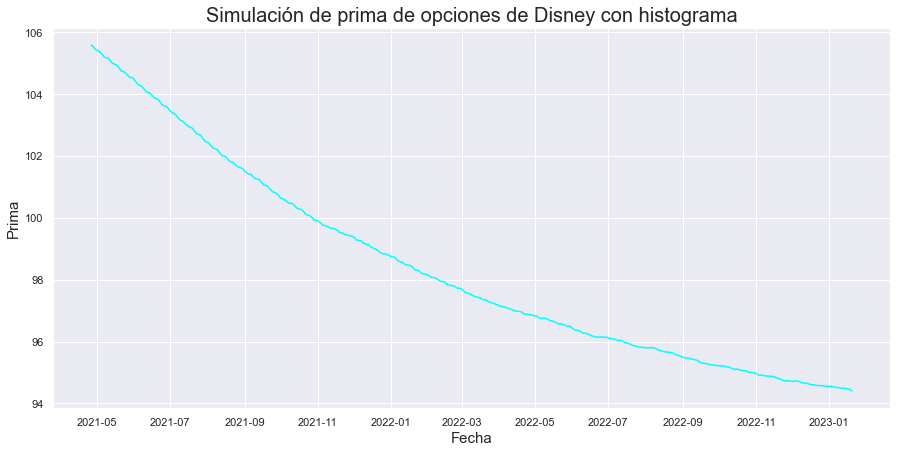

In [20]:
np.random.seed(1234) # semilla
K = opcion_valuar["JSON"]["strike"]
nscen = 100000
ndays = len(dates)
freq, values = np.histogram(ret_dis + r - mu, bins = 2000) # histograma tomando la tasa libre de riesgo
prob = freq / np.sum(freq)
ret = np.random.choice(values[1:], ndays * nscen, p = prob) # simulación de los rendimientos
sim_ret_hist = pd.DataFrame(ret.reshape((ndays, nscen)), index = dates) # simulación de precios
sim_closes_hist = (closes_dis.iloc[-1, 0]) * np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K * np.ones(ndays * nscen).reshape((ndays, nscen)), index = dates)
put_hist = pd.DataFrame({"Prima": np.exp(-r * ndays) * np.fmax(strike - sim_closes_hist, 0).T.mean()}, index = dates)

plt.figure(figsize = [15, 7])
plt.plot(put_hist, color = "cyan")
plt.title("Simulación de prima de opciones de Disney con histograma", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show();

Mostrar 10 escenarios:

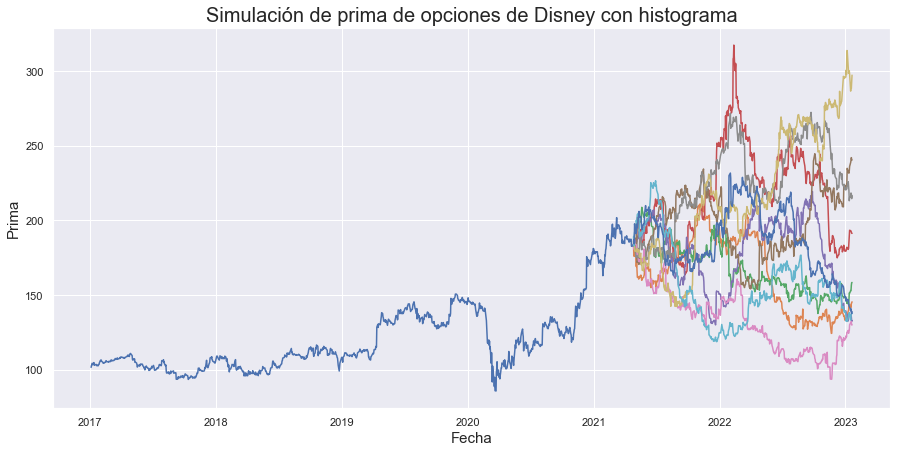

In [21]:
plt.figure(figsize = [15, 7]) # simulación de montecarlo
sim_hist = pd.concat([closes_dis, sim_closes_hist[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])
plt.plot(sim_hist)
plt.title("Simulación de prima de opciones de Disney con histograma", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show();

Mostrar la valuación de la opción según la simulación:

In [22]:
put_hist.iloc[-1] # valuación de la opción

Prima    94.4
Name: 2023-01-20 00:00:00, dtype: float64

Se escoge un valor de alpha  𝛼  (nivel de significancia) de 0.05; es decir, se elige un nivel de confianza de 0.95 para valuar la opción:

In [23]:
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc = mean_est, scale = sigma_est)
print("Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza", i2)

Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza (93.86497627154125, 94.93478768850179)


In [24]:
opcion_valuar["JSON"] # ver lastprice y compararlo con la valuación anterior

{'contractSymbol': 'DIS230120P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 106.6,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 18,
 'bid': 108.8,
 'ask': 110.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1618844493,
 'impliedVolatility': 0.29114478393554677,
 'inTheMoney': True}

El precio resultante de la valuación de la opción con la simulación con un histograma se asemeja al *lastPrice*, sin embargo las simulaciones anteriores se ajustan mejor.

La conclusión final, es que si bien de acuerdo a valuación analítica con el modelo de Black Scholes la opción de venta de Disney está infravalorada (lo que indica que es buena idea comprarla), **las simulaciones previas indican que está sobrevalorada** porque el precio de la valuación siempre da menor que el *lastPrice* (lo que indica que es buena idea venderla). Si bien estas valuaciones son contradictorias, es muy probable que ninguna sea acertada, pues se sabe que en un mercado de competencia perfecta y con información simétrica, no hay oportunidad de que ocurra arbitraje (porque en ese caso todos los inversores en conjunto, mantendrían el precio de mercado siempre en equilibrio). Por lo tanto, no es conveniente sacar conclusiones con base en este modelo sobre si es mejor "comprar" o "vender".